In [100]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

np.set_printoptions(edgeitems=4, threshold=20)

In [77]:
m, n = 30, 100
ar, ai = np.random.randn(m, n), np.random.randn(m, n)
br, bi = np.random.randn(m), np.random.randn(m)
a = ar + 1j * ai
b = br + 1j * bi

a.shape, b.shape

((30, 100), (30,))

Solving part (a)


In [101]:
# Solving the complex problem
x = cp.Variable(n, complex=True)
obj = cp.Minimize(cp.sum_squares(x))
cons = [a @ x == b]
prob = cp.Problem(obj, cons)
prob.solve()
prob.status, prob.value, x.value

('optimal',
 0.5025944476349391,
 array([-0.03432182+0.06690657j, -0.04428813-0.0454953j ,
        -0.06547539+0.06691364j,  0.12586948+0.01421392j, ...,
         0.02871451-0.11968292j, -0.08428061-0.04948329j,
        -0.02800274+0.04670617j,  0.00435453+0.11578884j], shape=(100,)))

In [102]:
# Solving the equivalent real problem

z = cp.Variable(2 * n)
obj = cp.Minimize(cp.sum_squares(z))

a_tilde = np.block([[ar, -ai], [ai, ar]])
b_tilde = np.vstack([br, bi]).flatten()
cons = [a_tilde @ z == b_tilde]

prob = cp.Problem(obj, cons)
prob.solve()
prob.status, prob.value, z.value

('optimal',
 0.5025944476349389,
 array([-0.03432182, -0.04428813, -0.06547539,  0.12586948, ...,
        -0.11968292, -0.04948329,  0.04670617,  0.11578884], shape=(200,)))

In [103]:
b_tilde.shape, (a_tilde @ z).shape, a_tilde.shape

((60,), (60,), (60, 200))

If true, confirms that the real problem formulation is correct:


In [104]:
np.allclose(x.value, z.value[:n] + 1j * z.value[n:])

True

Solving part (b)


In [105]:
x_inf = cp.Variable(n, complex=True)
obj = cp.Minimize(cp.norm(x_inf, "inf"))
cons = [a @ x_inf == b]
prob = cp.Problem(obj, cons)
prob.solve()
prob.status, prob.value, x_inf.value

('optimal',
 np.float64(0.08316732986905695),
 array([-0.06659251+0.04982211j, -0.04903506-0.06717416j,
        -0.0417989 +0.07190033j,  0.08247577+0.01070293j, ...,
         0.01448245-0.08189666j, -0.07478241-0.03639224j,
        -0.06386924+0.05326842j,  0.00043068+0.08316621j], shape=(100,)))

In [107]:
x_one = cp.Variable(n, complex=True)
obj = cp.Minimize(cp.norm(x_one, 1))
cons = [a @ x_one == b]
prob = cp.Problem(obj, cons)
prob.solve()
prob.status, prob.value, x_one.value

('optimal',
 np.float64(5.349209734807389),
 array([-2.16484705e-02+7.95011524e-02j, -1.46674992e-02-1.51381773e-02j,
        -2.96522777e-02+1.81492230e-02j,  4.30079459e-02-5.31249717e-03j,
        ...,  5.89240057e-02-1.65140688e-01j,
        -1.49474156e-08-5.21841153e-09j, -2.38052802e-04+1.24386247e-02j,
        -1.65702625e-02+3.01517720e-01j], shape=(100,)))

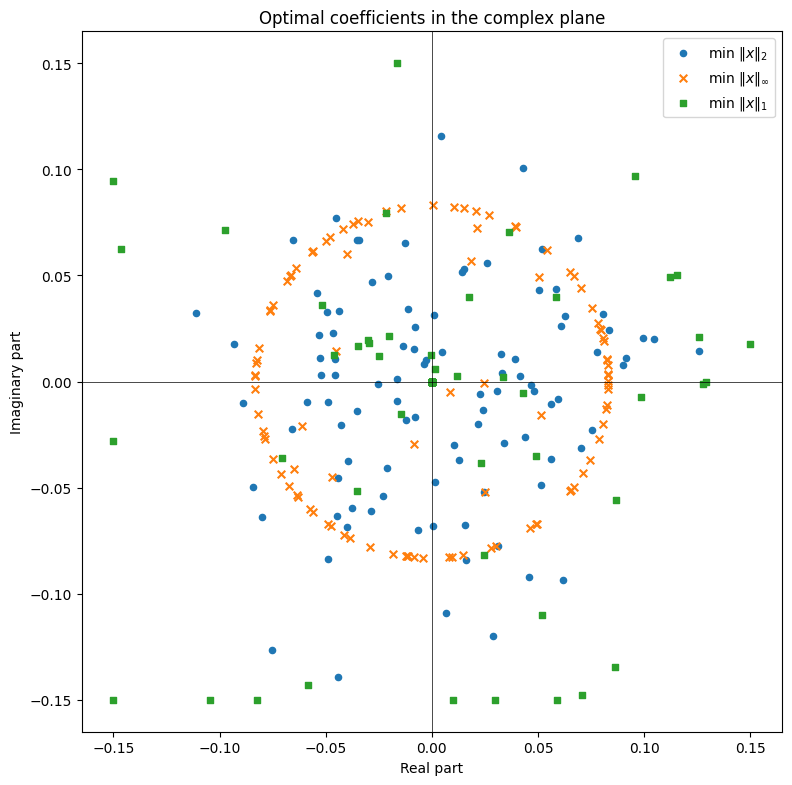

In [117]:
# scatter plot in the complex plane
plt.figure(figsize=(8, 8))
plt.scatter(x.value.real, x.value.imag, marker="o", s=20, label=r"min $\|x\|_2$")
plt.scatter(
    x_inf.value.real, x_inf.value.imag, marker="x", s=30, label=r"min $\|x\|_\infty$"
)
# Option 1: Clip outliers to a reasonable range
max_abs = 0.15  # adjust as needed
x1_real = np.clip(x_one.value.real, -max_abs, max_abs)
x1_imag = np.clip(x_one.value.imag, -max_abs, max_abs)
plt.scatter(x1_real, x1_imag, marker="s", s=25, label=r"min $\|x\|_1$")

plt.axhline(0, color="k", lw=0.5)
plt.axvline(0, color="k", lw=0.5)
plt.gca().set_aspect("equal")
plt.xlabel("Real part")
plt.ylabel("Imaginary part")
plt.title("Optimal coefficients in the complex plane")
plt.legend()
plt.tight_layout()
plt.show()